# Libraries

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix


# Data With 12 Beef Cuts 

In [42]:
insideOutside = pd.read_excel(r'e-nose_dataset_12_beef_cuts.xlsx', sheet_name=0)
roundData = pd.read_excel(r'e-nose_dataset_12_beef_cuts.xlsx', sheet_name=1)
topSirloin = pd.read_excel(r'e-nose_dataset_12_beef_cuts.xlsx', sheet_name=2)
tenderloin = pd.read_excel(r'e-nose_dataset_12_beef_cuts.xlsx', sheet_name=3)
flapMeat = pd.read_excel(r'e-nose_dataset_12_beef_cuts.xlsx', sheet_name=4)
striploin = pd.read_excel(r'e-nose_dataset_12_beef_cuts.xlsx', sheet_name=5)
ribEye = pd.read_excel(r'e-nose_dataset_12_beef_cuts.xlsx', sheet_name=6)
skirtMeat = pd.read_excel(r'e-nose_dataset_12_beef_cuts.xlsx', sheet_name=7)
brisket = pd.read_excel(r'e-nose_dataset_12_beef_cuts.xlsx', sheet_name=8)
clodChuck = pd.read_excel(r'e-nose_dataset_12_beef_cuts.xlsx', sheet_name=9)
shin = pd.read_excel(r'e-nose_dataset_12_beef_cuts.xlsx', sheet_name=10)
fat = pd.read_excel(r'e-nose_dataset_12_beef_cuts.xlsx', sheet_name=11)

dfs = [insideOutside, roundData, topSirloin, tenderloin, flapMeat, striploin, ribEye, skirtMeat, brisket, clodChuck, shin, fat]

for df in dfs:
    df.drop(['Minute'], axis=1, inplace=True)

In [43]:
beefData = pd.concat(dfs, ignore_index=True)

In [44]:
label_mapping = {1: 0, 2: 1, 3: 2, 4: 3}
beefData['Label'] = beefData['Label'].replace(label_mapping)

# Distribution of Labels

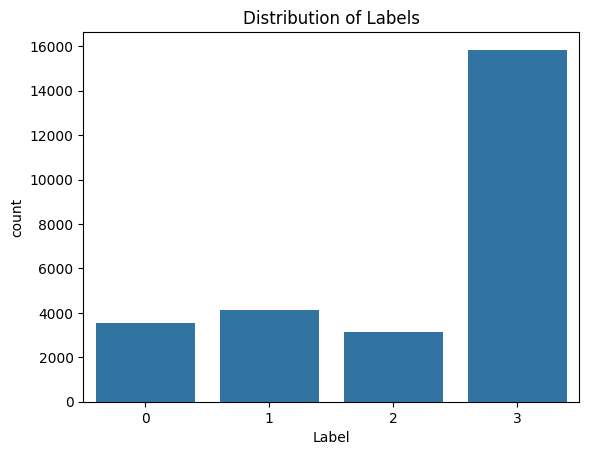

In [45]:
sns.countplot(x='Label', data=beefData)
plt.title('Distribution of Labels')
plt.show()

# Correlation Matrix

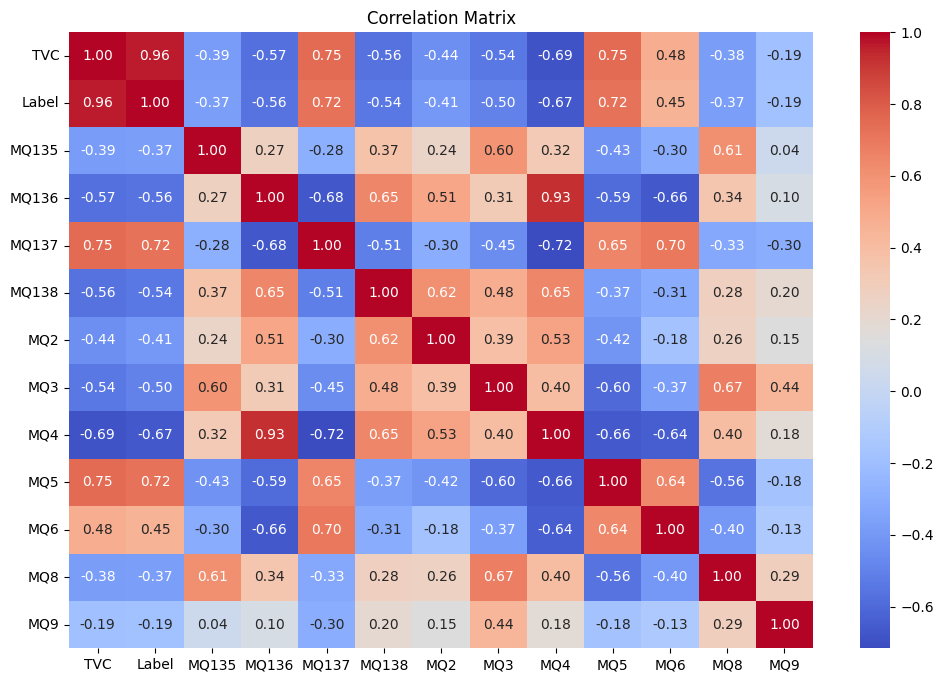

In [46]:
correlationMatrix = beefData.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Boxplot Of Features

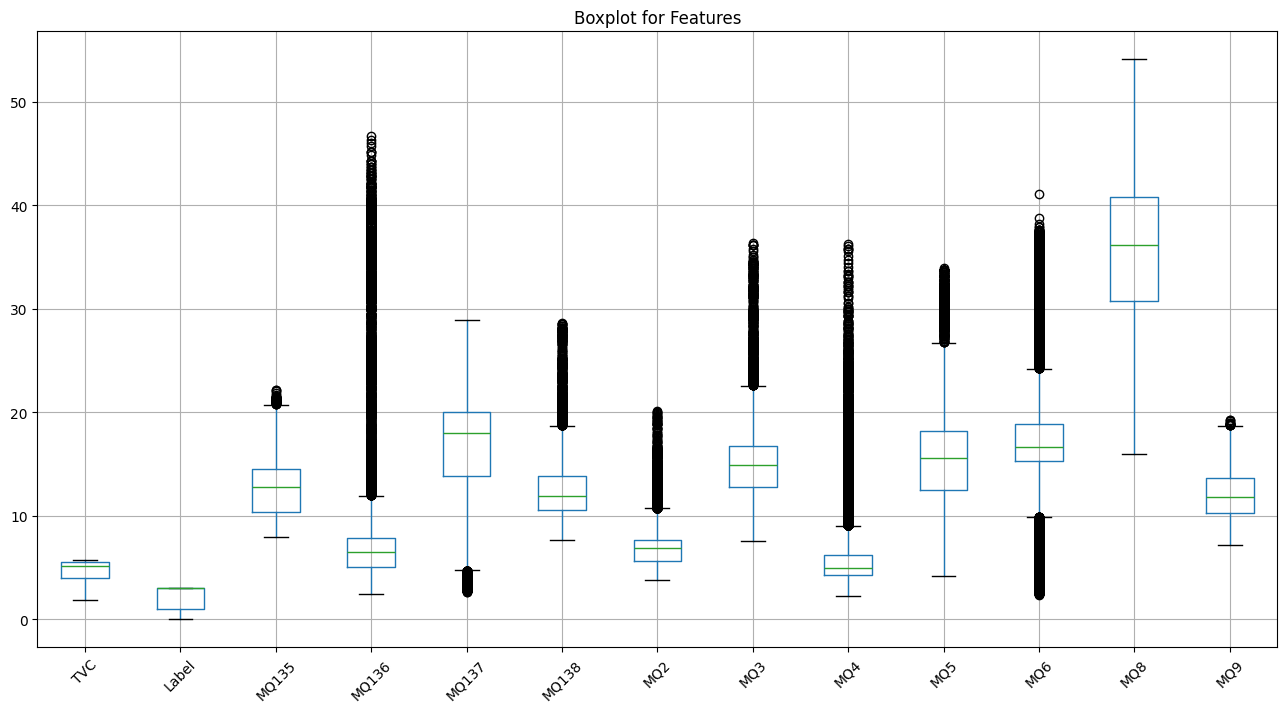

In [47]:
plt.figure(figsize=(16, 8))
beefData.boxplot(rot=45)
plt.title('Boxplot for Features')
plt.show()

# Data Preparation

In [48]:
X = beefData.drop('Label', axis=1)
y = beefData['Label']



In [49]:
y.unique()

array([0, 1, 2, 3], dtype=int64)

##  0=excellent,1=good,2=acceptable”, and 3=spoiled, ##

In [50]:
from tensorflow.keras.utils import to_categorical

# One-hot encode target data
y_encoded = to_categorical(y, num_classes=4)


# Feature Selection using ANOVA

In [51]:
kBest = SelectKBest(score_func=f_classif, k=10)
XBest = kBest.fit_transform(X, y)

selectedFeaturesIndices = kBest.get_support(indices=True)
selectedFeatures = X.columns[selectedFeaturesIndices]
print("Selected Features:", selectedFeatures)



Selected Features: Index(['TVC', 'MQ135', 'MQ136', 'MQ137', 'MQ138', 'MQ2', 'MQ3', 'MQ4', 'MQ5',
       'MQ6'],
      dtype='object')


# Visualize Feature Scores

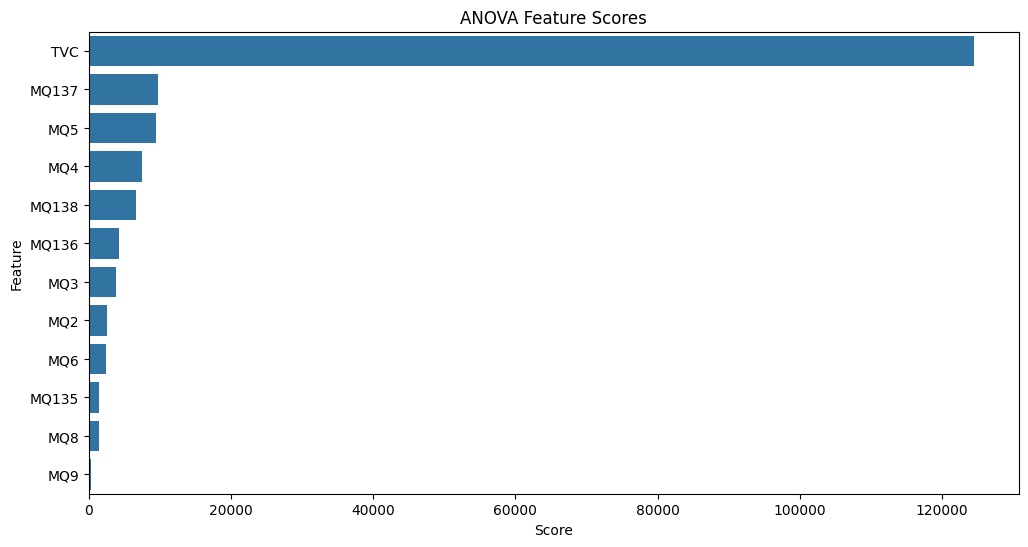

In [52]:
featureScores = pd.DataFrame({'Feature': X.columns, 'Score': kBest.scores_})
featureScores = featureScores.sort_values(by='Score', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Score', y='Feature', data=featureScores)
plt.title('ANOVA Feature Scores')
plt.show()


In [53]:
X_new= beefData[['TVC','MQ137','MQ5']]
XTrain, XTest, yTrain, yTest = train_test_split(X_new, y_encoded, test_size=0.2, random_state=42)


# ANN 1st Approach

#### Data Scaling

In [54]:
scaler = StandardScaler()
XTrainScaled = scaler.fit_transform(XTrain)
XTestScaled = scaler.transform(XTest)

#### Resampling for Imbalanced Classification

In [56]:
smote = SMOTE(random_state=42)
XTrainResampled, yTrainResampled = smote.fit_resample(XTrainScaled, yTrain)

In [57]:
XTrainResampled.shape

(50548, 3)

In [58]:
XTrainResampled.shape

(50548, 3)

#### Neural Network Model Definition

In [59]:
from tensorflow.keras.layers import LeakyReLU
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation=LeakyReLU(0.1), input_dim=3),
    tf.keras.layers.Dense(units=64, activation=LeakyReLU(0.1)),
    tf.keras.layers.Dense(units=4, activation='softmax')
])

d:\conda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Model Training

In [60]:
yTrainResampled.shape

(50548, 4)

In [61]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(XTrainResampled, yTrainResampled, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8808 - loss: 0.3126 - val_accuracy: 0.9122 - val_loss: 0.2096
Epoch 2/100
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9910 - loss: 0.0365 - val_accuracy: 0.8953 - val_loss: 0.1714
Epoch 3/100
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9969 - loss: 0.0153 - val_accuracy: 0.9773 - val_loss: 0.0586
Epoch 4/100
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9993 - loss: 0.0072 - val_accuracy: 0.9927 - val_loss: 0.0263
Epoch 5/100
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9991 - loss: 0.0047 - val_accuracy: 0.9955 - val_loss: 0.0166
Epoch 6/100
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9967 - loss: 0.0140 - val_accuracy: 1.0000 - val_loss: 0.0047
Epoch 7/100
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9991 - loss: 0.0030 - val_accuracy: 0.9992 - val_loss: 0.0068
Epoch 8/100
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9981 - loss: 0

#### Model Evaluation

In [62]:
import numpy as np

In [63]:
yTest.shape

(5328, 4)

In [64]:
model.evaluate(XTest,yTest)

167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5932 - loss: 571.7695


[563.2324829101562, 0.6011636853218079]

# KNN 2nd Approach

#### Using elbow method to first determine K 

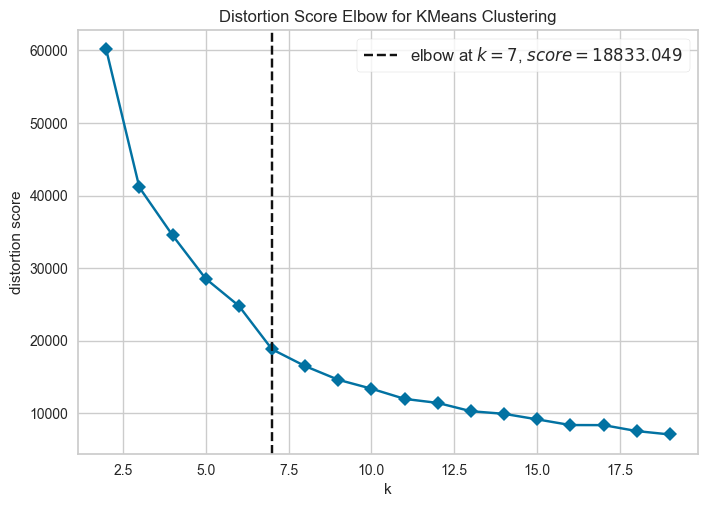

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [65]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2, 20), timings=False)
visualizer.fit(XTrainResampled)
visualizer.show()


#### KNN Model Training

In [66]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(XTrainResampled, yTrainResampled)

KNeighborsClassifier(n_neighbors=7)

#### Model Evaluation

In [72]:
from sklearn.metrics import precision_score, recall_score, f1_score

yPredKnn = knn.predict(XTestScaled)


# Calculate precision, recall, and F1-score separately for each class
precision = precision_score(yTest, yPredKnn, average='weighted')
recall = recall_score(yTest, yPredKnn, average='weighted')
f1 = f1_score(yTest, yPredKnn, average='weighted')




In [76]:
knn.score(XTestScaled,yTest)

0.9992492492492493

In [74]:
print(precision)
print(recall)
print(f1)

0.9992509168530117
0.9992492492492493
0.9992496978599086


# SVM 3rd Approach

#### Model Training

In [79]:
y_train_labels = np.argmax(yTrain, axis=1)

svmModel = SVC(kernel='linear', random_state=42,decision_function_shape='ovr')
svmModel.fit(XTrainScaled, y_train_labels)

SVC(kernel='linear', random_state=42)

#### Model Evaluation

In [80]:
y_test_label=np.argmax(yTest,axis=1)
yPredSvm = svmModel.predict(XTestScaled)

accuracySvm = accuracy_score(y_test_label, yPredSvm)
confMatrixSvm = confusion_matrix(y_test_label, yPredSvm)
classificationRepSvm = classification_report(y_test_label, yPredSvm)

print(f'SVM Accuracy: {accuracySvm}')
print(f'SVM Confusion Matrix:\n{confMatrixSvm}')
print(f'SVM Classification Report:\n{classificationRepSvm}')

SVM Accuracy: 0.9971846846846847
SVM Confusion Matrix:
[[ 697    0    0    0]
 [   0  835    0    0]
 [   0    6  587    0]
 [   0    0    9 3194]]
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       697
           1       0.99      1.00      1.00       835
           2       0.98      0.99      0.99       593
           3       1.00      1.00      1.00      3203

    accuracy                           1.00      5328
   macro avg       0.99      1.00      1.00      5328
weighted avg       1.00      1.00      1.00      5328



# Logistic Regression 4th Approach

#### Model Training

In [83]:
logreg = LogisticRegression()
logreg.fit(XTrainScaled, y_train_labels)

LogisticRegression()

#### Model Evaluation

In [85]:
yPredLr = logreg.predict(XTestScaled)

accuracyLr = accuracy_score(y_test_label, yPredLr)
confMatrixLr = confusion_matrix(y_test_label, yPredLr)
classificationRepLr = classification_report(y_test_label, yPredLr)

print(f'LR Accuracy: {accuracyLr}')
print(f'LR Confusion Matrix:\n{confMatrixLr}')
print(f'LR Classification Report:\n{classificationRepLr}')

LR Accuracy: 0.9915540540540541
LR Confusion Matrix:
[[ 697    0    0    0]
 [   0  822   13    0]
 [   0   32  561    0]
 [   0    0    0 3203]]
LR Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       697
           1       0.96      0.98      0.97       835
           2       0.98      0.95      0.96       593
           3       1.00      1.00      1.00      3203

    accuracy                           0.99      5328
   macro avg       0.98      0.98      0.98      5328
weighted avg       0.99      0.99      0.99      5328



# Confusion Matrix of All Approaches

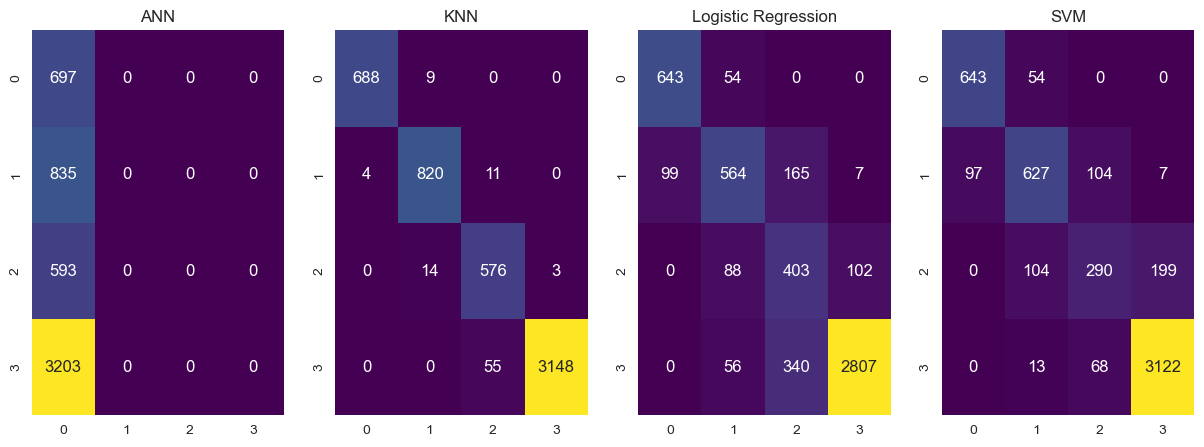

In [23]:
confMatrixAnn = confusion_matrix(yTest, yPredAnn)
confMatrixKnn = confusion_matrix(yTest, yPredKnn)
confMatrixLr = confusion_matrix(yTest, yPredLr)
confMatrixSvm = confusion_matrix(yTest, yPredSvm)

fig, axes = plt.subplots(1, 4, figsize=(15, 5))

cmap = sns.color_palette("viridis", as_cmap=True)

sns.heatmap(confMatrixAnn, annot=True, fmt='d', cmap=cmap, ax=axes[0], cbar=False)
axes[0].set_title('ANN')

sns.heatmap(confMatrixKnn, annot=True, fmt='d', cmap=cmap, ax=axes[1], cbar=False)
axes[1].set_title('KNN')

sns.heatmap(confMatrixLr, annot=True, fmt='d', cmap=cmap, ax=axes[2], cbar=False)
axes[2].set_title('Logistic Regression')

sns.heatmap(confMatrixSvm, annot=True, fmt='d', cmap=cmap, ax=axes[3], cbar=False)
axes[3].set_title('SVM')

plt.show()

# Evaluation Metrics of All Approaches

In [103]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

accuracyKnn = knn.score(XTestScaled, yTest)
#accuracyAnn = accuracy_score(yTest, model.predict(XTestScaled))
accuracyLr = logreg.score(XTestScaled, y_test_label)
accuracySvm = svmModel.score(XTestScaled, y_test_label)

f1Knn = f1_score(yTest, yPredKnn, average='weighted')
#f1Ann = f1_score(yTest, model.predict(XTestScaled), average='weighted')
f1Lr = f1_score(y_test_label, yPredLr, average='weighted')
f1Svm = f1_score(y_test_label, yPredSvm, average='weighted')

precisionKnn = precision_score(yTest, yPredKnn, average='weighted')
#precisionAnn = precision_score(yTest, model.predict(XTestScaled), average='weighted')
precisionLr = precision_score(y_test_label, yPredLr, average='weighted')
precisionSvm = precision_score(y_test_label, yPredSvm, average='weighted')

recallKnn = recall_score(yTest, yPredKnn, average='weighted')
#recallAnn = recall_score(yTest, model.predict(XTestScaled), average='weighted')
recallLr = recall_score(y_test_label, yPredLr, average='weighted')
recallSvm = recall_score(y_test_label, yPredSvm, average='weighted')

#confMatrixKnn = confusion_matrix(yTest, yPredKnn)
#confMatrixAnn = confusion_matrix(y_test_label, model.predict(XTestScaled))
confMatrixLr = confusion_matrix(y_test_label, yPredLr)
confMatrixSvm = confusion_matrix(y_test_label, yPredSvm)

tpLr, fnLr, fpLr, tnLr = np.diag(confMatrixLr)
tpSvm, fnSvm, fpSvm, tnSvm = np.diag(confMatrixSvm)

specificityLr = tnLr / (fpLr + tnLr)
specificitySvm = tnSvm / (fpSvm + tnSvm)


metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Specificity']
modelNames = ['KNN', 'Logistic Regression', 'SVM']

values = [
    [accuracyKnn, f1Knn, precisionKnn, recallKnn],
    [accuracyLr, f1Lr, precisionLr, recallLr, specificityLr],
    [accuracySvm, f1Svm, precisionSvm, recallSvm, specificitySvm]
]

metricsDf = pd.DataFrame(values, columns=metrics, index=modelNames)

print(metricsDf)


                     Accuracy  F1 Score  Precision    Recall  Specificity
KNN                  0.999249  0.999250   0.999251  0.999249          NaN
Logistic Regression  0.991554  0.991533   0.991607  0.991554     0.850956
SVM                  0.997185  0.997189   0.997201  0.997185     0.844750
